In [1]:
import pandas as pd
import numpy as np

In [38]:
df_1 = pd.read_csv("/Users/chenyian/DS_mini_project/drive-download-20240302T104351Z-001/merged_2025-01.csv")
df_1 = df_1.sort_values("Day").set_index("Day")
df_1 = df_1.rename(columns = {'Mid-Price': 'Mid_Price'})
df_1.tail()

,Time,Bid1,Bid2,Ask1,Ask2,Mid_Price,Total_volume,Bid_ask_spread,Order_imbalance
Day,,,,,,,,,
2025-01-30,10:19:53,"[311.0, 10]","[309.0, 20]","[321.28, 47]","[326.19, 48]",316.14,125,10.28,-0.52
2025-01-30,10:19:52,"[311.0, 8]","[309.0, 16]","[320.0, 32]","[328.0, 24]",315.50,80,9.00,-0.40
2025-01-30,10:19:51,"[311.97, 31]","[310.67, 12]","[320.0, 44]","[325.73, 33]",315.98,120,8.03,-0.28
2025-01-30,10:20:03,"[313.52, 85]","[312.04, 23]","[323.0, 65]","[326.24, 68]",318.26,241,9.48,-0.10
2025-01-30,15:59:59,"[320.25, 32]","[317.53, 34]","[327.9, 52]","[329.2, 60]",324.08,178,7.65,-0.26


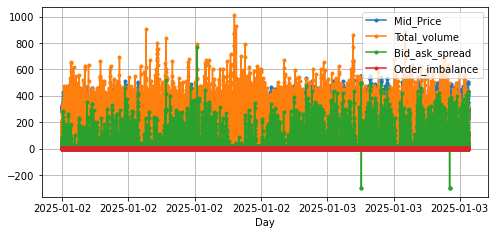

In [8]:
import matplotlib.pyplot as plt

df_1["2025-01-02":"2025-01-03"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

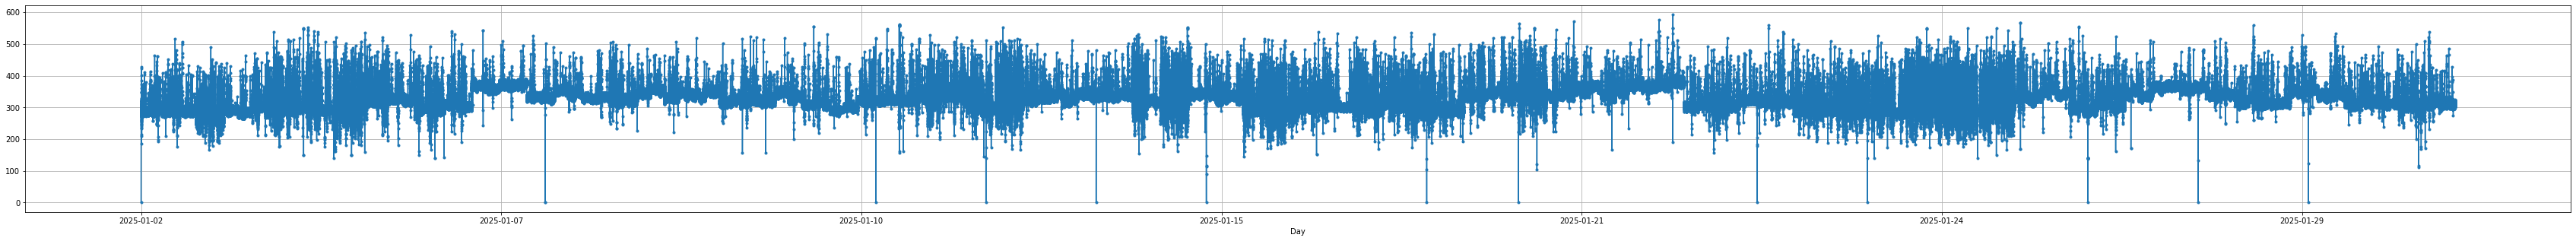

In [15]:
df_1.Mid_Price.plot(grid=True, marker=".", figsize=(60, 5))

plt.show()

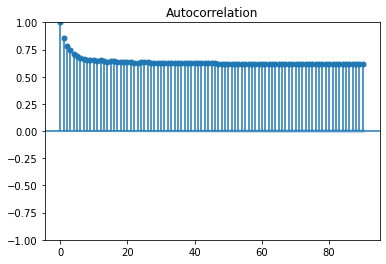

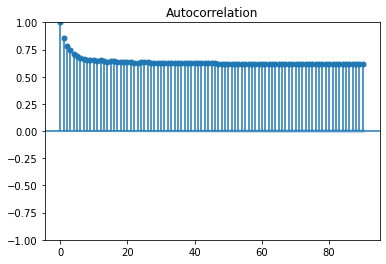

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_1.Mid_Price, lags=90)

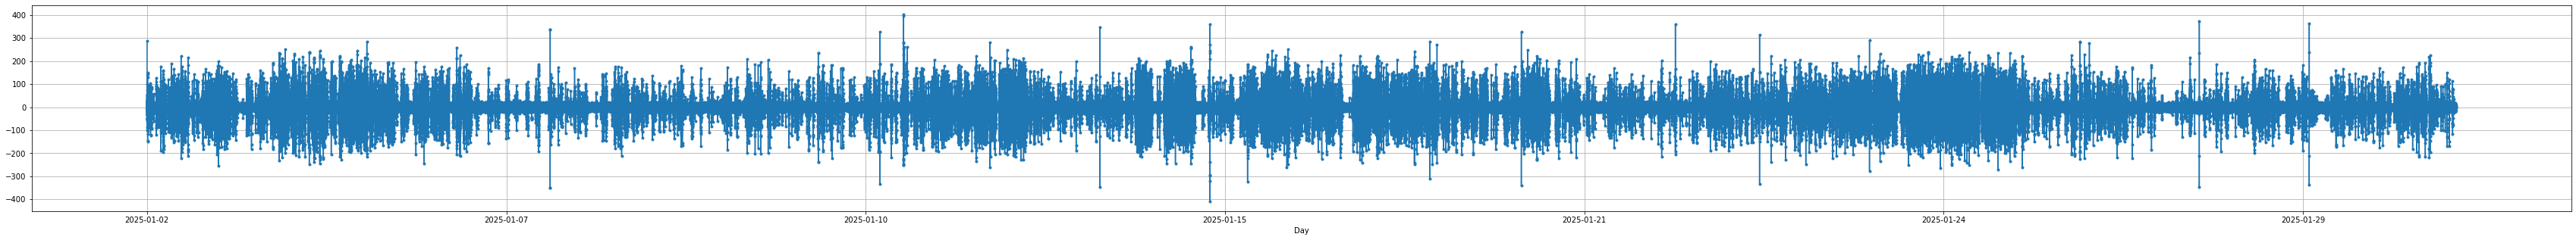

In [23]:
# differencing
diff_7 = df_1.Mid_Price.diff(7)
diff_7.plot(grid=True, marker=".", figsize=(60, 5))

plt.show()

In [34]:
abs(diff_7).mean()

12.377128535056558

In [35]:
def to_windows(dataset, length):
    dataset = dataset.window(length, shift=1, drop_remainder=True)
    return dataset.flat_map(lambda window_ds: window_ds.batch(length))

In [37]:
df = df_1['Mid_Price']
df

Day
2025-01-02      0.50
2025-01-02    288.77
2025-01-02    251.89
2025-01-02    285.05
2025-01-02    285.11
               ...  
2025-01-30    316.14
2025-01-30    315.50
2025-01-30    315.98
2025-01-30    318.26
2025-01-30    324.08
Name: Mid_Price, Length: 642571, dtype: float64

In [39]:
train = df["2025-01-02":"2025-01-20"]
valid = df["2025-01-21":"2025-01-25"]
test = df["2025-01-26":"2025-01-30"]

In [40]:
import tensorflow as tf

In [41]:
# simple RNN

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

Metal device set to: Apple M1


2024-03-04 17:23:57.683299: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-04 17:23:57.683566: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [42]:
# more complex RNN
# Containing 32 recurrent neurons
univar_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1]),
    tf.keras.layers.Dense(1)  # no activation function by default
])

In [43]:
# Deep RNN

deep_model = tf.keras.Sequential([
    # first 2 are seq-to-seq
    tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    # seq-to-vec
    tf.keras.layers.SimpleRNN(32),
    # produce the model's forecast (vec-to-vec)
    tf.keras.layers.Dense(1)
])

In [46]:
X = valid.to_numpy()[np.newaxis, :56, np.newaxis]
for step_ahead in range(14):
    y_pred_one = univar_model.predict(X)
    X = np.concatenate([X, y_pred_one.reshape(1, 1, 1)], axis=1)


2024-03-04 18:13:37.742529: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-04 18:13:37.813160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-03-04 18:13:38.303925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-03-04 18:13:38.544659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
